# Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import os

In [9]:
path = os.getcwd().replace('GitHub', 'github_data')

# Getting IBOVESPA data from Yahoo!

In [3]:
cotacao_ibov = yf.download('^BVSP', start = "2023-01-01", end = "2023-08-07")
cotacao_ibov.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,109734.0,109734.0,105981.0,106376.0,106376.0,8130500
2023-01-03,106377.0,106684.0,103852.0,104166.0,104166.0,14466700
2023-01-04,104167.0,105627.0,103915.0,105334.0,105334.0,14451200
2023-01-05,105336.0,107743.0,105333.0,107518.0,107518.0,15512000
2023-01-06,107642.0,109433.0,107642.0,108836.0,108836.0,12626600


<Axes: xlabel='Date'>

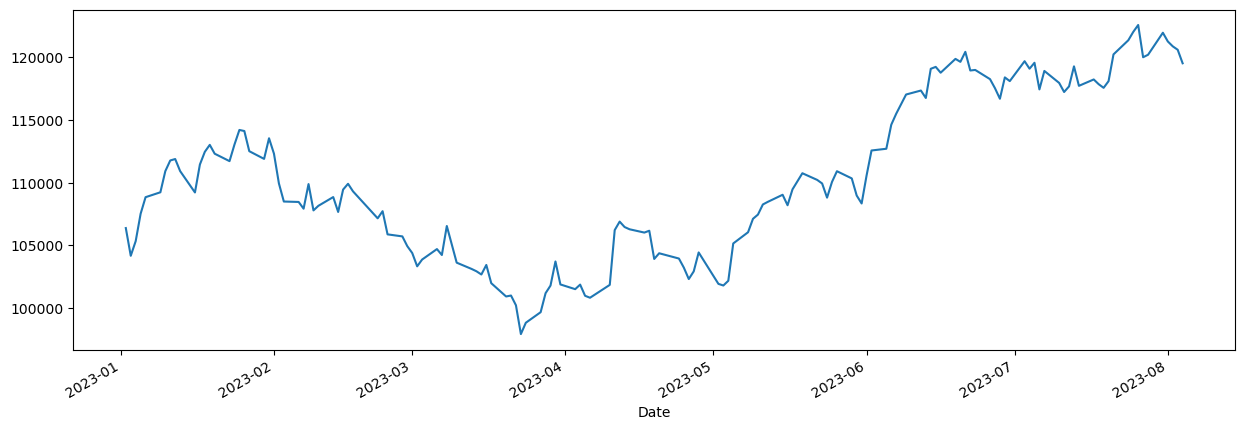

In [4]:
cotacao_ibov['Adj Close'].plot(figsize=(15, 5))

In [5]:
return_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Return de {:.2%}'.format(return_ibov))

Retorno de 12.34%


## Moving average

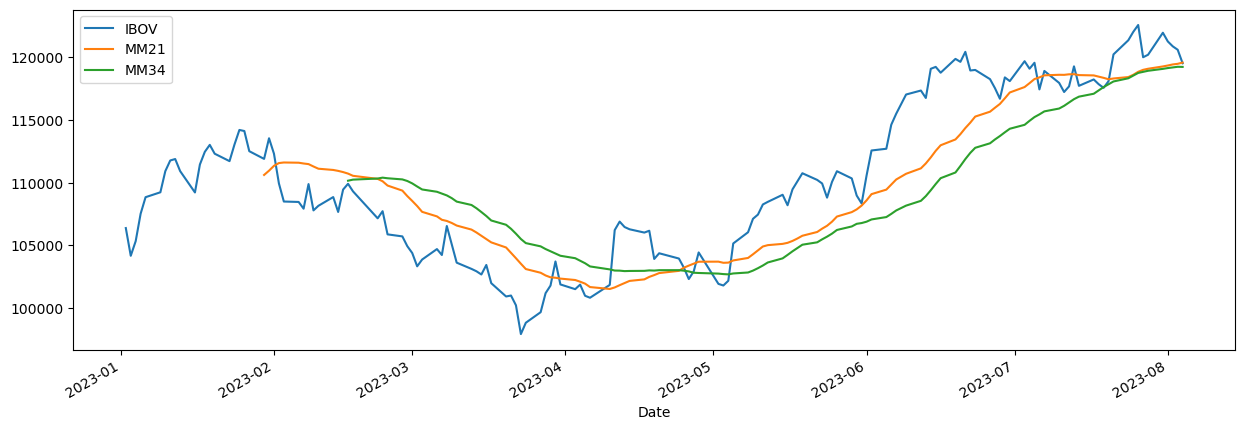

In [6]:
cotacao_ibov['Adj Close'].plot(figsize=(15, 5), label='IBOV')
cotacao_ibov['Adj Close'].rolling(21).mean().plot(label='MM21')
cotacao_ibov['Adj Close'].rolling(34).mean().plot(label='MM34')
plt.legend()
plt.show()

# Custom wallet

In [10]:
wallet = pd.read_excel(path+r'/Carteira.xlsx')
display(wallet)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


## Assets in investment portfolio

In [14]:
cotacoes_wallet = pd.DataFrame()

for ativo in wallet['Ativos']:
    cotacoes_wallet[ativo] = yf.download('{}.SA'.format(ativo), start = "2023-01-01", end = "2023-08-07")['Adj Close']
    
display(cotacoes_wallet)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GNDI3.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2023-01-02,102.629997,93.800003,2.59,13.863370,23.878443,11.20,7.080892,22.229681,NaN,10.640000,90.295319,95.266800,133.180008,92.021378
2023-01-03,100.480003,90.199997,2.54,13.175403,23.381178,11.03,6.785033,21.166868,NaN,10.120000,89.650948,93.531563,132.408401,90.265610
2023-01-04,101.919998,92.000000,2.55,13.213045,23.449430,11.45,7.080892,21.842302,NaN,11.020000,91.322571,92.854630,130.169846,90.863518
2023-01-05,104.269997,94.500000,2.66,13.787117,24.180700,11.71,7.327441,22.730000,NaN,11.700000,91.331902,94.008270,130.808090,92.059341
2023-01-06,105.500000,95.029999,2.76,14.172969,24.599962,12.38,7.731782,22.860001,NaN,12.250000,90.426071,93.550621,130.522324,91.300087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,117.949997,112.900002,3.35,16.640980,28.622351,13.37,11.410000,34.009998,NaN,18.270000,75.619995,109.279999,160.299988,113.610001
2023-08-01,117.519997,113.089996,3.43,16.601027,28.709999,13.36,11.980000,33.799999,NaN,18.340000,73.430000,108.699997,161.389999,114.000000
2023-08-02,117.010002,113.000000,3.33,16.670000,28.620001,13.38,11.730000,33.209999,NaN,18.090000,74.250000,108.980003,160.399994,114.050003


## Check if data fro yahoo is correct

In [17]:
cotacoes_wallet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2023-01-02 to 2023-08-04
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  149 non-null    float64
 1   SMAL11  149 non-null    float64
 2   MGLU3   149 non-null    float64
 3   BBDC4   149 non-null    float64
 4   ITUB4   149 non-null    float64
 5   ENEV3   149 non-null    float64
 6   MOVI3   149 non-null    float64
 7   BPAC11  148 non-null    float64
 8   GNDI3   0 non-null      float64
 9   NTCO3   149 non-null    float64
 10  BCRI11  149 non-null    float64
 11  VILG11  149 non-null    float64
 12  KNRI11  149 non-null    float64
 13  XPLG11  149 non-null    float64
dtypes: float64(14)
memory usage: 17.5 KB


## Adjusting data

In [18]:
#df_media = cotacoes_wallet.mean()
#cotacoes_wallet = cotacoes_wallet.fillna(df_media)
cotacoes_wallet = cotacoes_wallet.ffill()
cotacoes_wallet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2023-01-02 to 2023-08-04
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  149 non-null    float64
 1   SMAL11  149 non-null    float64
 2   MGLU3   149 non-null    float64
 3   BBDC4   149 non-null    float64
 4   ITUB4   149 non-null    float64
 5   ENEV3   149 non-null    float64
 6   MOVI3   149 non-null    float64
 7   BPAC11  149 non-null    float64
 8   GNDI3   0 non-null      float64
 9   NTCO3   149 non-null    float64
 10  BCRI11  149 non-null    float64
 11  VILG11  149 non-null    float64
 12  KNRI11  149 non-null    float64
 13  XPLG11  149 non-null    float64
dtypes: float64(14)
memory usage: 17.5 KB


## Visualize asset individually

In [19]:
#df_media = cotacoes_wallet.mean()
#cotacoes_wallet = cotacoes_wallet.fillna(df_media)
cotacoes_wallet = cotacoes_wallet.ffill()
cotacoes_wallet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2023-01-02 to 2023-08-04
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  149 non-null    float64
 1   SMAL11  149 non-null    float64
 2   MGLU3   149 non-null    float64
 3   BBDC4   149 non-null    float64
 4   ITUB4   149 non-null    float64
 5   ENEV3   149 non-null    float64
 6   MOVI3   149 non-null    float64
 7   BPAC11  149 non-null    float64
 8   GNDI3   0 non-null      float64
 9   NTCO3   149 non-null    float64
 10  BCRI11  149 non-null    float64
 11  VILG11  149 non-null    float64
 12  KNRI11  149 non-null    float64
 13  XPLG11  149 non-null    float64
dtypes: float64(14)
memory usage: 17.5 KB


## Comparing with IBOVESPA

In [21]:
cotation_ibov = yf.download('^BVSP', start = "2023-01-01", end = "2023-08-07")
display(cotation_ibov)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,109734.0,109734.0,105981.0,106376.0,106376.0,8130500
2023-01-03,106377.0,106684.0,103852.0,104166.0,104166.0,14466700
2023-01-04,104167.0,105627.0,103915.0,105334.0,105334.0,14451200
2023-01-05,105336.0,107743.0,105333.0,107518.0,107518.0,15512000
2023-01-06,107642.0,109433.0,107642.0,108836.0,108836.0,12626600
...,...,...,...,...,...,...
2023-07-31,120188.0,122149.0,120188.0,121943.0,121943.0,10122700
2023-08-01,121945.0,121945.0,120154.0,121248.0,121248.0,10302800
2023-08-02,121249.0,121252.0,119798.0,120859.0,120859.0,10565900


## Dataframe with total assets

In [22]:
invested_value = pd.DataFrame()

for ativo in wallet['Ativos']:
    invested_value[ativo] = cotacoes_wallet[ativo] * wallet.loc[wallet['Ativos']==ativo, 'Qtde'].values[0]
display(invested_value)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2023-01-02,10262.999725,9380.000305,2589.999914,1386.336994,2387.844276,3359.999943,708.089209,2222.968102,NaN,1064.000034,9029.531860,9526.679993,13318.000793,9202.137756
2023-01-03,10048.000336,9019.999695,2539.999962,1317.540264,2338.117790,3308.999920,678.503323,2116.686821,NaN,1011.999989,8965.094757,9353.156281,13240.840149,9026.560974
2023-01-04,10191.999817,9200.000000,2549.999952,1321.304512,2344.943047,3434.999943,708.089209,2184.230232,NaN,1102.000046,9132.257080,9285.462952,13016.984558,9086.351776
2023-01-05,10426.999664,9450.000000,2660.000086,1378.711700,2418.070030,3513.000011,732.744122,2272.999954,NaN,1169.999981,9133.190155,9400.827026,13080.809021,9205.934143
2023-01-06,10550.000000,9502.999878,2759.999990,1417.296886,2459.996223,3714.000034,773.178244,2286.000061,NaN,1225.000000,9042.607117,9355.062103,13052.232361,9130.008698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,11794.999695,11290.000153,3349.999905,1664.097977,2862.235069,4010.999966,1140.999985,3400.999832,NaN,1827.000046,7561.999512,10927.999878,16029.998779,11361.000061
2023-08-01,11751.999664,11308.999634,3430.000067,1660.102654,2870.999908,4007.999897,1197.999954,3379.999924,NaN,1834.000015,7343.000031,10869.999695,16138.999939,11400.000000
2023-08-02,11701.000214,11300.000000,3329.999924,1667.000008,2862.000084,4014.000034,1172.999954,3320.999908,NaN,1809.000015,7425.000000,10898.000336,16039.999390,11405.000305


## Wallet vs. IBOV

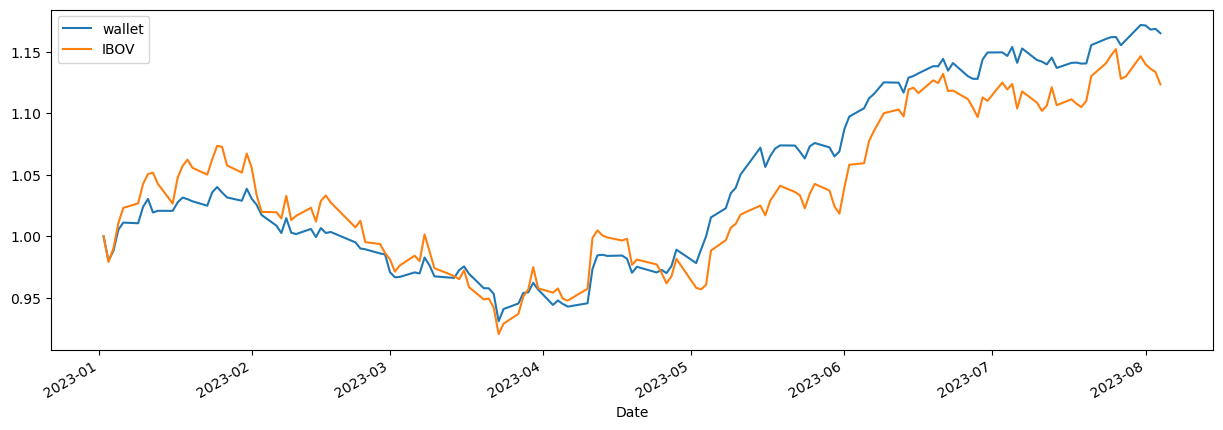

In [23]:
invested_value['Total'] = invested_value.sum(axis=1)

invested_value_norm = invested_value / invested_value.iloc[0]
cotation_ibov_norm = cotation_ibov / cotation_ibov.iloc[0]

invested_value_norm['Total'].plot(figsize=(15, 5), label='wallet')
cotation_ibov_norm['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()

In [24]:
return_wallet = invested_value['Total'][-1] / invested_value['Total'][0] - 1
return_ibov = cotation_ibov['Adj Close'][-1] / cotation_ibov['Adj Close'][0] - 1
print('Wallet return: {:.2%}'.format(return_wallet))
print('IBOV return: {:.2%}'.format(return_ibov))

Retorno da wallet: 16.50%
Retorno IBOV: 12.34%


## Correlation wallet and IBOV

In [ ]:
correlacation = invested_value['Total'].corr(cotation_ibov['Adj Close'])
print(correlacation)